In [38]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import plotly.express as px

In [39]:
data = pd.read_csv('AQI_data.csv')
data.shape

(355586, 43)

In [40]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data = data.dropna()
data.head()

State Code  County Code       State         County  \
0           6           13  California   Contra Costa   
1          17           31    Illinois           Cook   
2           6           73  California      San Diego   
3           6           13  California   Contra Costa   
4           6           83  California  Santa Barbara   

                        City  Date Local          NO2 Units   NO2 Mean  \
0              Bethel Island  2009-05-10  Parts per billion   4.043478   
1                     Cicero  2000-09-30  Parts per billion  18.125000   
2                  San Diego  2001-09-27  Parts per billion  25.090909   
3              Bethel Island  2009-03-11  Parts per billion   8.476190   
4  Vandenberg Air Force Base  2006-10-12  Parts per billion   0.739130   

   NO2 1st Max Value  NO2 1st Max Hour  ...  month   day  \
0                9.0                 0  ...    5.0  10.0   
1               30.0                17  ...    9.0  30.0   
2               40.0                23  ...    9.0  27.0   
3               20.0                20  ...    3.0  11.0   
4                4.0                17  ...   10.0  12.0   

   temperature_2m_max (°F)  temperature_2m_min (°F)  temperature_2m_mean (°F)  \
0                     84.3                     54.0                 69.408330   
1                     73.2                     55.6                 63.637493   
2                     75.6                     64.6                 69.529160   
3                     59.4                     39.0                 48.216670   
4                     65.7                     53.4                 58.512497   

   precipitation_sum (mm) rain_sum (mm)  snowfall_sum (cm)  \
0                     0.0           0.0                0.0   
1                     0.0           0.0                0.0   
2                     0.0           0.0                0.0   
3                     0.0           0.0                0.0   
4                     2.9           2.9                0.0   

   windgusts_10m_max (km/h)  windspeed_10m_max (km/h)  
0                         0                      18.1  
1                         0                      24.6  
2                         0                      15.2  
3                         0                       7.5  
4                         0                      12.7  

[5 rows x 42 columns]

In [41]:
data = data.sort_values(by='Date Local', ascending=True)

In [42]:
data.head()

State Code  County Code       State            County  \
605             12           95     Florida            Orange   
59986           51           59    Virginia           Fairfax   
331148          22           33   Louisiana  East Baton Rouge   
113929           6           83  California     Santa Barbara   
244969           6           83  California     Santa Barbara   

                             City  Date Local          NO2 Units   NO2 Mean  \
605                   Winter Park  2000-01-01  Parts per billion  14.750000   
59986                      McLean  2000-01-01  Parts per billion  27.041667   
331148                Baton Rouge  2000-01-01  Parts per billion  31.083333   
113929  Vandenberg Air Force Base  2000-01-01  Parts per billion   0.130435   
244969                     Lompoc  2000-01-01  Parts per billion   8.809524   

        NO2 1st Max Value  NO2 1st Max Hour  ...  month  day  \
605                  32.0                 0  ...    1.0  1.0   
59986                37.0                19  ...    1.0  1.0   
331148               72.0                18  ...    1.0  1.0   
113929                1.0                 0  ...    1.0  1.0   
244969               25.0                 0  ...    1.0  1.0   

        temperature_2m_max (°F)  temperature_2m_min (°F)  \
605                        73.0                     54.2   
59986                      53.6                     31.5   
331148                     67.8                     51.1   
113929                     53.9                     46.9   
244969                     55.2                     49.8   

        temperature_2m_mean (°F)  precipitation_sum (mm) rain_sum (mm)  \
605                    63.233340                     0.0           0.0   
59986                  43.312500                     0.0           0.0   
331148                 58.304170                     0.0           0.0   
113929                 49.600006                     0.0           0.0   
244969                 52.191666                     0.0           0.0   

        snowfall_sum (cm)  windgusts_10m_max (km/h)  windspeed_10m_max (km/h)  
605                   0.0                         0                       9.7  
59986                 0.0                         0                      12.5  
331148                0.0                         0                      10.2  
113929                0.0                         0                      28.6  
244969                0.0                         0                      28.6  

[5 rows x 42 columns]

In [43]:
data.isnull().sum()

State Code                  0
County Code                 0
State                       0
County                      0
City                        0
Date Local                  0
NO2 Units                   0
NO2 Mean                    0
NO2 1st Max Value           0
NO2 1st Max Hour            0
NO2 AQI                     0
O3 Units                    0
O3 Mean                     0
O3 1st Max Value            0
O3 1st Max Hour             0
O3 AQI                      0
SO2 Units                   0
SO2 Mean                    0
SO2 1st Max Value           0
SO2 1st Max Hour            0
SO2 AQI                     0
CO Units                    0
CO Mean                     0
CO 1st Max Value            0
CO 1st Max Hour             0
CO AQI                      0
AQI                         0
deviation                   0
state_num                   0
County_num                  0
City_num                    0
year                        0
month                       0
day       

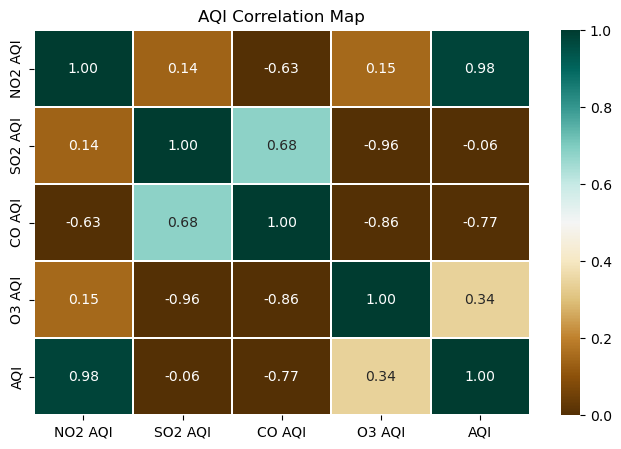

In [44]:
aqi = data[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI', 'AQI']]
heatmap = aqi.iloc[:3].corr()
plt.figure(figsize=(8,5))
sns.heatmap(heatmap, annot=True, linewidths=0.1, cmap='BrBG', fmt = ".2f", vmin=0, vmax=1)
plt.title("AQI Correlation Map")
plt.show()

In [45]:
print(len(data['State'].unique()))

42


In [46]:
print(len(data['City'].unique()))
print(data['City'].unique())

143
['Winter Park' 'McLean' 'Baton Rouge' 'Vandenberg Air Force Base' 'Lompoc'
 'Hawthorne' 'Calexico' 'Vallejo' 'Chula Vista' 'Capitan' 'Houston'
 'Pittsburg' 'Holtsville' 'Tucson' 'San Francisco' 'Long Beach' 'Burbank'
 'Camden' 'Concord' 'Kansas City' 'Philadelphia' 'Rubidoux' 'San Diego'
 'San Pablo' 'Scottsdale' 'Bethel Island' 'Washington' 'Davenport'
 'Costa Mesa' 'New York' 'Welby' 'Dallas' 'Seven Corners' 'Phoenix'
 'Goleta' 'El Paso' 'Chicago' 'Victorville' 'Ashland' 'Paducah'
 'Henderson' 'Arden-Arcade' 'Los Angeles'
 'Lexington-Fayette (corporate name for Lexington)' 'Park Hill'
 'Ponca City' 'Louisville' 'Cicero' 'Freemansburg' 'Pittsburgh'
 'Charleroi' 'New Castle' 'Lancaster'
 'Calumet City (PU RR name Calumet Park (sta.))' 'Beaver Falls' 'York'
 'St. Louis' 'Ferguson' 'Johnstown' 'Greensburg' 'Bristol' 'Ladue'
 'Scranton' 'Sunset Hills' 'Detroit' 'Norristown' 'Reading'
 'Indianapolis (Remainder)' 'Alexandria' 'Charlotte' 'Altoona' 'St. Ann'
 'Winston-Salem' 'Bakersfield

In [47]:
data.describe()

State Code    County Code       NO2 Mean  NO2 1st Max Value  \
count  355586.000000  355586.000000  355586.000000      355586.000000   
mean       21.768326      72.687350      13.117908          25.863598   
std        17.089758      83.174846       9.402841          15.739543   
min         1.000000       1.000000      -2.000000          -2.000000   
25%         6.000000      13.000000       6.168182          14.000000   
50%        17.000000      59.000000      11.086957          24.000000   
75%        40.000000      95.000000      18.041667          36.000000   
max        80.000000     650.000000     139.541667         267.000000   

       NO2 1st Max Hour        NO2 AQI        O3 Mean  O3 1st Max Value  \
count     355586.000000  355586.000000  355586.000000     355586.000000   
mean          11.746885      24.325460       0.026024          0.039235   
std            7.869067      14.896715       0.011386          0.015390   
min            0.000000       0.000000       0.000000          0.000000   
25%            5.000000      13.000000       0.017750          0.029000   
50%            9.000000      23.000000       0.025833          0.038000   
75%           20.000000      34.000000       0.033833          0.048000   
max           23.000000     132.000000       0.095083          0.141000   

       O3 1st Max Hour         O3 AQI  ...          month            day  \
count    355586.000000  355586.000000  ...  355586.000000  355586.000000   
mean         10.184898      36.074635  ...       6.529458      15.747785   
std           3.979063      19.879401  ...       3.276008       8.809793   
min           0.000000       0.000000  ...       1.000000       1.000000   
25%           9.000000      25.000000  ...       4.000000       8.000000   
50%          10.000000      33.000000  ...       7.000000      16.000000   
75%          11.000000      42.000000  ...       9.000000      23.000000   
max          23.000000     218.000000  ...      12.000000      31.000000   

       temperature_2m_max (°F)  temperature_2m_min (°F)  \
count            355586.000000            355586.000000   
mean                 69.819701                51.925870   
std                  16.372690                14.768435   
min                 -17.900000               -34.600000   
25%                  59.500000                43.100000   
50%                  70.800000                53.100000   
75%                  81.700000                62.300000   
max                 120.500000                93.700000   

       temperature_2m_mean (°F)  precipitation_sum (mm)  rain_sum (mm)  \
count             355586.000000           355586.000000  355586.000000   
mean                  60.466845                2.068099       1.981356   
std                   15.230158                6.077954       5.983614   
min                  -28.804169                0.000000       0.000000   
25%                   51.445835                0.000000       0.000000   
50%                   61.250004                0.000000       0.000000   
75%                   71.475000                0.700000       0.600000   
max                  105.783320              195.200000     195.200000   

       snowfall_sum (cm)  windgusts_10m_max (km/h)  windspeed_10m_max (km/h)  
count      355586.000000                  355586.0             355586.000000  
mean            0.063806                       0.0                 16.259782  
std             0.673467                       0.0                  6.151334  
min             0.000000                       0.0                  2.500000  
25%             0.000000                       0.0                 11.800000  
50%             0.000000                       0.0                 15.200000  
75%             0.000000                       0.0                 19.600000  
max            38.920000                       0.0                 71.300000  

[8 rows x 34 columns]

In [48]:
data['Date Local']  = pd.to_datetime(data['Date Local'])

In [49]:
# TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2), Ozone (O3), Sulfur Dioxide (SO2) and Carbon Monoxide (CO) for 2000-2016

# Calculating mean value of pollutants for every State
df_AQI = data[['State', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI','AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)
df_AQI_State

State    NO2 AQI     O3 AQI    SO2 AQI     CO AQI  \
0                Alabama  21.228900  36.831202   5.970588   4.615090   
1                 Alaska  19.580972  17.712551  14.048583   7.674089   
2                Arizona  35.519994  37.929544   3.792442  10.940823   
3               Arkansas  21.058649  34.363152   3.535841   6.635960   
4             California  23.439416  35.586918   3.219991   8.515074   
5               Colorado  38.612283  33.884027   9.145229  10.029784   
6            Connecticut  18.458311  37.150321   3.253875   4.123196   
7      Country Of Mexico  37.960570  31.928691   5.849832  20.637164   
8               Delaware  21.557756  35.410341   3.137514   4.467547   
9   District Of Columbia  31.288206  34.013124  12.343809  13.240028   
10               Florida  16.395856  35.929179   2.346838   6.568115   
11              Illinois  29.022929  32.255801  11.623223   7.533615   
12               Indiana  24.398464  41.399693  12.243318   6.208909   
13                  Iowa  14.713028  33.829665   1.679798   3.688380   
14                Kansas  27.634814  32.616682  10.326201   9.023572   
15              Kentucky  25.597235  43.056507  14.614668   4.503457   
16             Louisiana  26.739698  34.015075   9.321273   7.220771   
17                 Maine  11.282182  28.070291   2.941396   3.464600   
18              Maryland  19.782572  36.870223   6.298624   5.079837   
19         Massachusetts  29.313658  25.663228   7.316714   5.801146   
20              Michigan  31.851490  40.022960  14.355154   8.099170   
21             Minnesota  15.830230  33.777656   1.707558   3.868565   
22              Missouri  29.493023  41.901057  15.286681   8.559831   
23                Nevada  23.955298  40.349752   1.427566   4.754967   
24         New Hampshire  16.797253  34.497253   7.835165   6.501648   
25            New Jersey  31.687378  34.152184   9.823053   7.329881   
26            New Mexico  24.470885  41.338746   1.675252   4.525196   
27              New York  31.262238  32.203230  13.715824   6.403819   
28        North Carolina  21.997689  44.378940   7.183199   6.452385   
29                  Ohio  22.074368  32.325007  12.786262   4.662787   
30              Oklahoma  14.905088  41.045539   3.179136   3.050883   
31                Oregon  17.243894  25.171303   2.415197   6.259837   
32          Pennsylvania  24.353417  39.686797  13.944268   4.909680   
33          Rhode Island  14.371284  37.640734   1.899431   3.736243   
34        South Carolina  18.655172  36.758621   1.068966   3.068966   
35          South Dakota  12.182292  34.843750   1.352431   2.974537   
36                 Texas  22.991983  35.833796   4.124928   5.369675   
37                  Utah  29.559688  40.532094   1.823635   7.346131   
38              Virginia  21.082151  38.644237   8.815836   5.921632   
39            Washington  21.717842  27.705394   2.373444   3.178423   
40             Wisconsin  26.166227  27.321900   7.387863   6.414248   
41               Wyoming   5.593123  41.260745   0.467049   0.000000   

          AQI  
0   37.599744  
1   27.514170  
2   45.156877  
3   35.722156  
4   40.402046  
5   46.154850  
6   39.341261  
7   44.869128  
8   39.012101  
9   42.042480  
10  36.674037  
11  40.080620  
12  43.280799  
13  34.264525  
14  38.342883  
15  45.929666  
16  38.180402  
17  29.128388  
18  39.425854  
19  34.037058  
20  45.353200  
21  34.800657  
22  45.674630  
23  44.507036  
24  35.783516  
25  43.311121  
26  43.688130  
27  41.215011  
28  45.787754  
29  36.713313  
30  41.634991  
31  27.875170  
32  43.285141  
33  38.134092  
34  36.965517  
35  35.292245  
36  39.308004  
37  46.712657  
38  41.726118  
39  30.589212  
40  33.519789  
41  41.260745

Text(0.1, 0.5, 'Mean value of AQI')

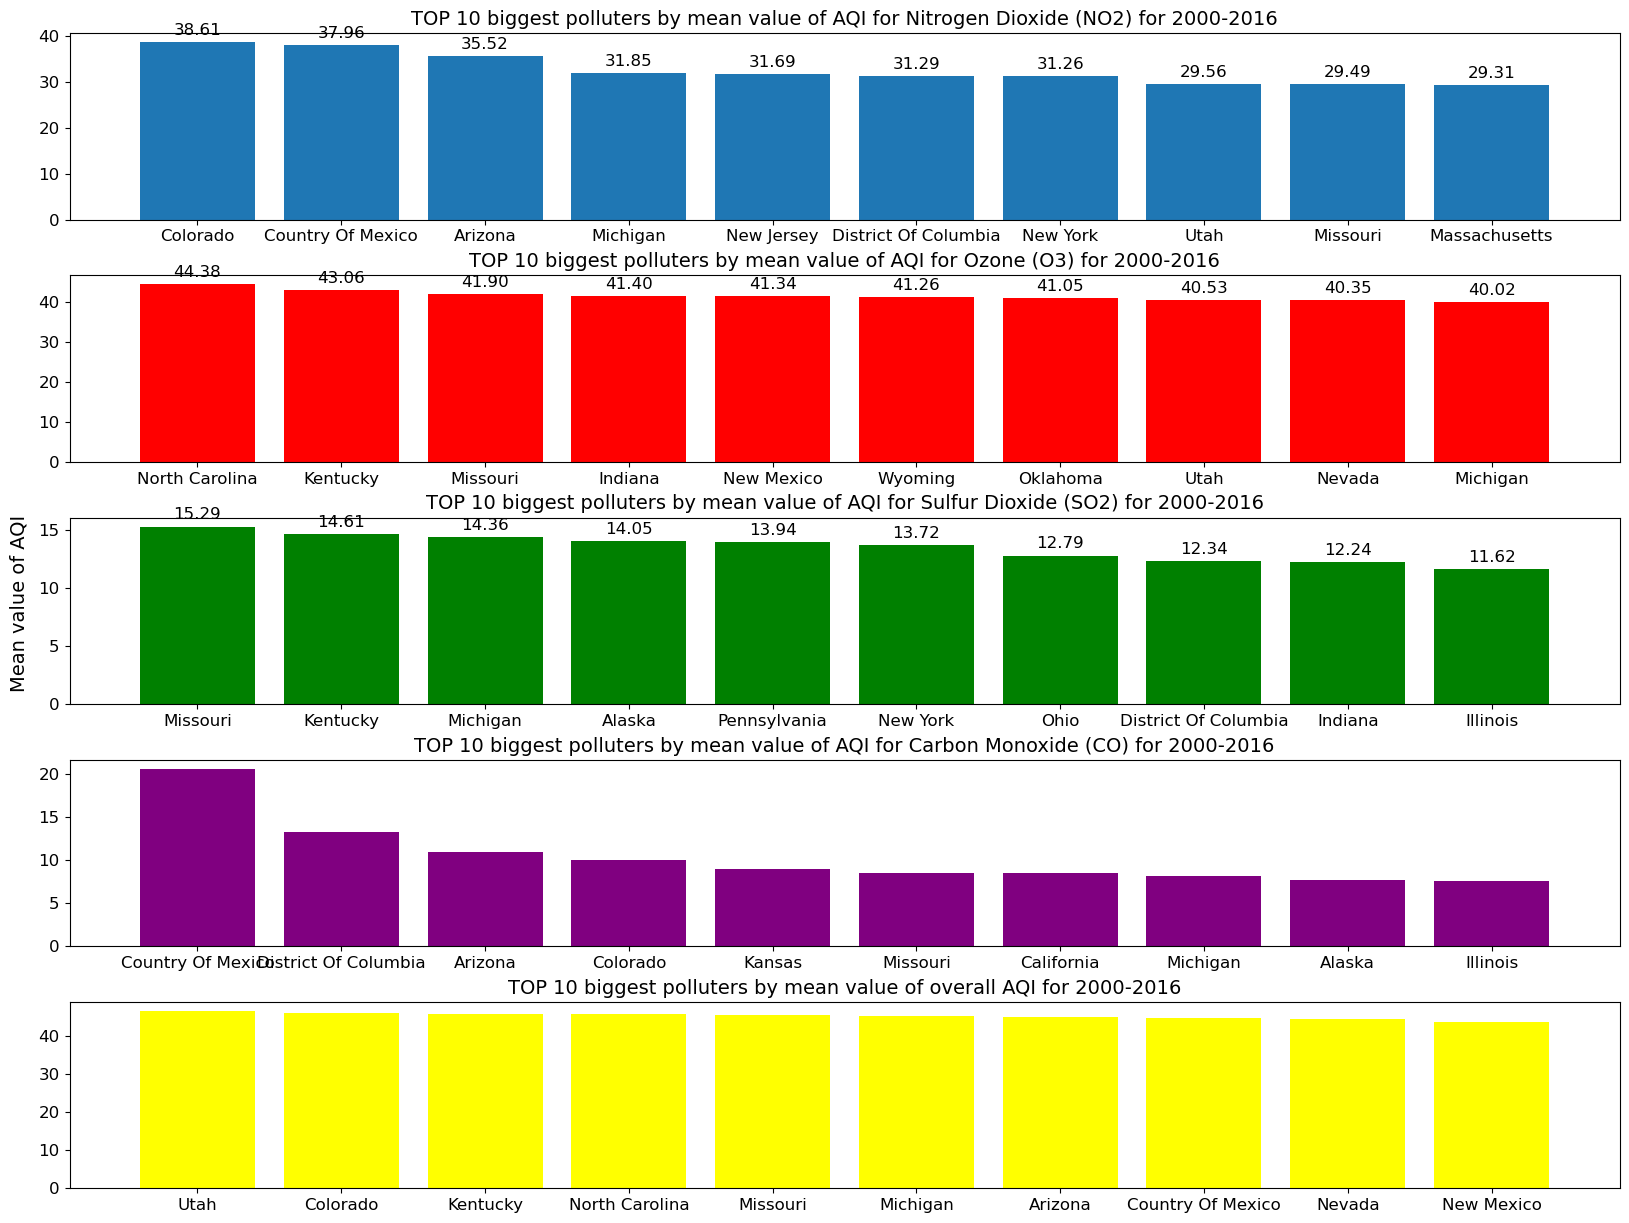

In [54]:
# TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2), Ozone (O3), Sulfur Dioxide (SO2), Carbon Monoxide (CO)  and Overall AQI for 2000-2016

# Calculating mean value of pollutants for every State
df_AQI = data[['State', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI','AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)

# Charts size
plt.rcParams["figure.figsize"] = (20, 15) 

# Creating x variable for 10 biggest polluters
x = np.arange(10)

# Adding four charts
fig, axs = plt.subplots(5, 1)

# Plot for NO2
df_AQI_State.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2 AQI', data=df_AQI_State[:10], label = 'NO2')
xlabels = df_AQI_State['State'].to_numpy()
xlabels = xlabels[:10]
plt.sca(axs[0])
plt.xticks(x, xlabels) # x axis marks

# Plot for O3
df_AQI_State.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
barplot2 = axs[1].bar(x, 'O3 AQI', data=df_AQI_State[:10], label = 'O3', color = 'red')
xlabels = df_AQI_State['State'].to_numpy()
xlabels = xlabels[:10]
plt.sca(axs[1])
plt.xticks(x, xlabels) # x axis marks

# Plot for SO2
df_AQI_State.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
barplot3 = axs[2].bar(x, 'SO2 AQI', data=df_AQI_State[:10], label = 'SO2', color = 'green')
xlabels = df_AQI_State['State'].to_numpy()
xlabels = xlabels[:10]
plt.sca(axs[2])
plt.xticks(x, xlabels) # x axis marks

# Plot for CO
df_AQI_State.sort_values(by = 'CO AQI', ascending = False, inplace = True)
barplot4 = axs[3].bar(x, 'CO AQI', data=df_AQI_State[:10], label = 'CO', color = 'purple')
xlabels = df_AQI_State['State'].to_numpy()
xlabels = xlabels[:10]
plt.sca(axs[3])
plt.xticks(x, xlabels) # x axis marks

# Plot for CO
df_AQI_State.sort_values(by = 'AQI', ascending = False, inplace = True)
barplot4 = axs[4].bar(x, 'AQI', data=df_AQI_State[:10], label = 'AQI', color = 'yellow')
xlabels = df_AQI_State['State'].to_numpy()
xlabels = xlabels[:10]
plt.sca(axs[4])
plt.xticks(x, xlabels) # x axis marks

# change of font size on both axes
axs[0].tick_params(axis='both', which='major', labelsize=12) 
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[3].tick_params(axis='both', which='major', labelsize=12)
axs[4].tick_params(axis='both', which='major', labelsize=12)

# Adding value for each bar
i = 0
def autolabel(rects):
    global i
    for rect in rects:
        height = rect.get_height()
        axs[i].annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 12)
    i = i + 1

autolabel(barplot1)
autolabel(barplot2)
autolabel(barplot3)
autolabel(barplot4)

# Space between charts
plt.subplots_adjust(hspace=0.3) 

# Adding plot titles and axis titles
axs[0].set_title('TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2) for 2000-2016', fontsize = 14)
axs[1].set_title('TOP 10 biggest polluters by mean value of AQI for Ozone (O3) for 2000-2016', fontsize = 14)
axs[2].set_title('TOP 10 biggest polluters by mean value of AQI for Sulfur Dioxide (SO2) for 2000-2016', fontsize = 14)
axs[3].set_title('TOP 10 biggest polluters by mean value of AQI for Carbon Monoxide (CO) for 2000-2016', fontsize = 14)
axs[4].set_title('TOP 10 biggest polluters by mean value of overall AQI for 2000-2016', fontsize = 14)
fig.text(0.1, 0.5, 'Mean value of AQI', ha='center', va='center', rotation='vertical', fontsize = 14)

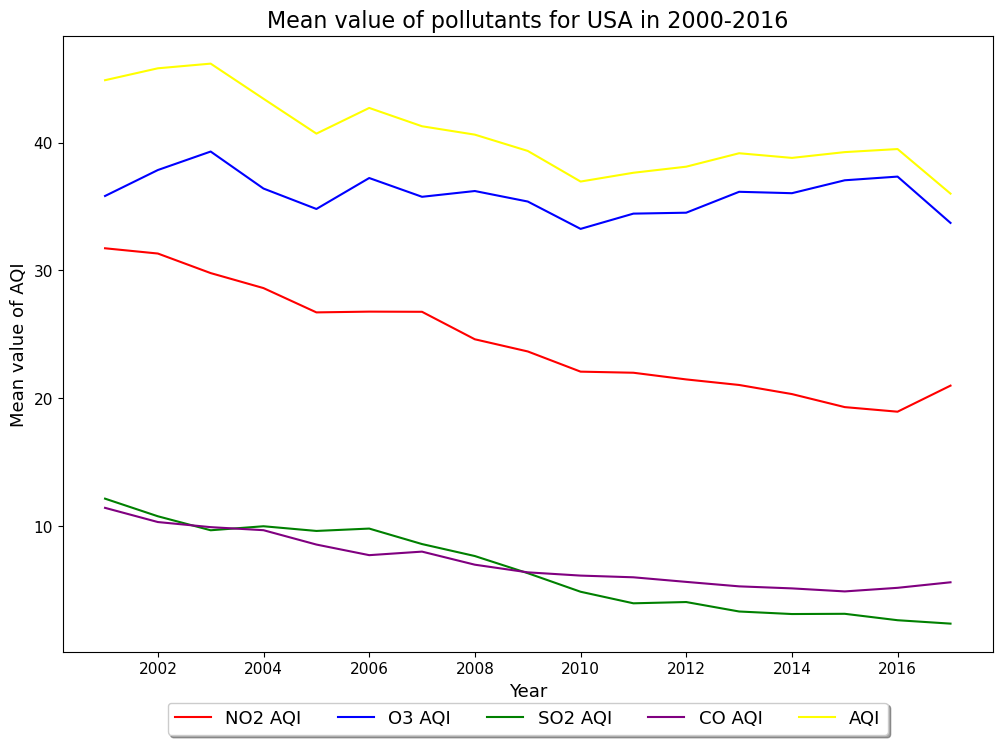

In [14]:
# Mean value of pollutants for USA in 2000-2016

# Data
df_AQI_Year = df_AQI[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI','AQI']].resample('Y', on = 'Date Local').mean()
df_AQI_Year.reset_index(inplace=True)

# Plot size
plt.rcParams["figure.figsize"] = (12, 8) 

# Adding plots
fig, ax = plt.subplots()
ax.plot('Date Local', 'NO2 AQI', data=df_AQI_Year, color = "red", label = "NO2 AQI")
ax.plot('Date Local', 'O3 AQI', data=df_AQI_Year, color = "blue", label = "O3 AQI")
ax.plot('Date Local', 'SO2 AQI', data=df_AQI_Year, color = "green", label = "SO2 AQI")
ax.plot('Date Local', 'CO AQI', data=df_AQI_Year, color = "purple", label = "CO AQI")
ax.plot('Date Local', 'AQI', data=df_AQI_Year, color = "yellow", label = "AQI")

# Adding plot title and axis titles
plt.title('Mean value of pollutants for USA in 2000-2016', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of AQI", fontsize = 13)

# change of font size on both axes
ax.tick_params(axis='both', which='major', labelsize=11) 

# Adding legend
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), ncol = 6, shadow = True, fontsize = 13)

In [15]:
## To use plotly choropleth maps, states names must be encoded.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [16]:
data = data[data['State']!='Country Of Mexico'] # deleting Mexico
data = data[data['State']!='District Of Columbia'] # deleting Columbia
data['State_abbrev'] = data.State.apply(lambda x: us_state_abbrev[x])

In [17]:
# Calculating annual mean value of pollutants for every State
df_AQI = data[['State_abbrev', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'AQI']]
df_AQI_State_Year = df_AQI.groupby('State_abbrev').resample('Y', on = 'Date Local').mean()
df_AQI_State_Year.reset_index(inplace = True)
df_AQI_State_Year

State_abbrev Date Local    NO2 AQI     O3 AQI    SO2 AQI    CO AQI  \
0             AK 2014-12-31  21.167598  15.206704  13.497207  8.050279   
1             AK 2015-12-31  18.679365  19.136508  14.361905  7.460317   
2             AL 2013-12-31  21.387097  18.903226   6.000000  5.354839   
3             AL 2014-12-31  21.486755  36.947020   6.513245  4.314570   
4             AL 2015-12-31  20.026667  37.343333   5.953333  4.833333   
..           ...        ...        ...        ...        ...       ...   
449           WA 2016-12-31  26.800000  23.133333   1.200000  4.666667   
450           WI 2006-12-31  26.152299  28.120690   7.500000  6.594828   
451           WI 2007-12-31  26.322581  18.354839   6.129032  4.387097   
452           WY 2014-12-31   6.750000  39.880952   0.761905  0.000000   
453           WY 2015-12-31   4.519337  42.541436   0.193370  0.000000   

           AQI  
0    26.452514  
1    28.117460  
2    25.193548  
3    37.827815  
4    37.590000  
..         ...  
449  30.466667  
450  34.008621  
451  28.032258  
452  39.880952  
453  42.541436  

[454 rows x 7 columns]

In [18]:
# Adding column coresponding to the year of Date Local column
df_AQI_State_Year['Year'] = df_AQI_State_Year['Date Local'].dt.year
# Sorting values by Date Local (for animated choropleth presented below)
df_AQI_State_Year.sort_values(by = 'Date Local', inplace = True)

In [19]:
# Plotly choropleth showing AQI for Nitrogen Dioxide changes from 2000 to 2016
fig_NO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='NO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Nitrogen Dioxide (NO2)',
              height=600,
             )

# Modifying legend 
fig_NO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [20]:
# Plotly choropleth showing AQI for Ozone changes from 2000 to 2016
fig_O3 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='O3 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Ozone (O3)',
              height=600,
             )

# Modifying legend 
fig_O3.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [21]:
# Plotly choropleth showing AQI for Sulfur Dioxide changes from 2000 to 2016
fig_SO2 = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='SO2 AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Sulfur Dioxide (SO2)',
              height=600,
             )

# Modifying legend 
fig_SO2.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [22]:
# Plotly choropleth showing AQI for Carbon Monoxide changes from 2000 to 2016
fig_CO = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='CO AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year for Carbon Monoxide (CO)',
              height=600,
             )

# Modifying legend 
fig_CO.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

In [23]:
# Plotly choropleth showing AQI for Carbon Monoxide changes from 2000 to 2016
fig_CO = px.choropleth(df_AQI_State_Year,
              locations = 'State_abbrev',
              animation_frame="Year", # showing changes through the years
              color='AQI',
              # Creating fixed scale (the same as defined by EPA)
              color_continuous_scale = [(0.00, "green"),   (0.1, "green"),
                                        (0.1, "yellow"), (0.2, "yellow"),
                                        (0.2, "orange"),  (0.3, "orange"),
                                        (0.3, "red"),  (0.4, "red"),
                                        (0.4, "purple"),  (0.6, "purple"),
                                        (0.6, "maroon"),  (1.00, "maroon"),
                                        ],
              range_color = (0, 500),
              locationmode='USA-states',
              scope="usa",
              title='Mean values of Air Quality Index (AQI) per year',
              height=600,
             )

# Modifying legend 
fig_CO.update_layout(coloraxis_colorbar=dict(
    title="Air Quality Index (AQI)",
    ticks="outside", 
    dtick=50
))

<h1>GDP vs Pollution

In [24]:

#Read the dataframes
us_GDP_Industry_df = pd.read_csv("GDP_and_Personal_Income.csv")

In [25]:
us_GDP_Industry_df.head()

year  Total Industry  Agriculture, forestry, fishing, and hunting  \
0  2000           10.25                                         0.10   
1  2001           10.58                                         0.10   
2  2002           10.94                                         0.10   
3  2003           11.46                                         0.11   
4  2004           12.21                                         0.14   

   Mining, quarrying, and oil and gas extraction  Utilities  Construction  \
0                                           0.11       0.18          0.46   
1                                           0.12       0.18          0.49   
2                                           0.11       0.18          0.49   
3                                           0.14       0.18          0.53   
4                                           0.17       0.20          0.58   

   Manufacturing  Wholesale trade  Retail trade  \
0           1.55             0.62          0.69   
1           1.47             0.61          0.71   
2           1.47             0.61          0.73   
3           1.52             0.64          0.77   
4           1.61             0.70          0.80   

   Transportation and warehousing  Information  \
0                            0.31         0.47   
1                            0.31         0.50   
2                            0.31         0.55   
3                            0.32         0.56   
4                            0.35         0.62   

   Finance, insurance, real estate, rental, and leasing  \
0                                               1.97      
1                                               2.13      
2                                               2.22      
3                                               2.30      
4                                               2.39      

   Professional and business services  \
0                                1.11   
1                                1.16   
2                                1.19   
3                                1.25   
4                                1.34   

   Educational services, health care, and social assistance  \
0                                               0.70          
1                                               0.75          
2                                               0.81          
3                                               0.86          
4                                               0.93          

   Arts, entertainment, recreation, accommodation, and food services  \
0                                               0.39                   
1                                               0.39                   
2                                               0.41                   
3                                               0.43                   
4                                               0.46                   

   Other services (except government and government enterprises)  \
0                                               0.28               
1                                               0.27               
2                                               0.28               
3                                               0.28               
4                                               0.30               

   Federal civilian  Military  State and local  
0              0.25      0.18             0.90  
1              0.25      0.18             0.96  
2              0.27      0.19             1.01  
3              0.28      0.21             1.05  
4              0.30      0.23             1.11

In [26]:
us_pollution_df_Overall = data.groupby(["year"]).mean()
#us_pollution_df_Overall

#Drop Columns not needed for analysis
us_pollution_df_Overall = us_pollution_df_Overall.loc[:,['NO2 AQI','O3 AQI','SO2 AQI','CO AQI','AQI']]
us_pollution_df_Overall

NO2 AQI     O3 AQI    SO2 AQI     CO AQI        AQI
year                                                         
2000.0  31.634822  35.970396  11.985600  11.264676  44.905469
2001.0  31.190330  37.952060  10.634928  10.172749  45.809057
2002.0  29.615274  39.337466   9.485693   9.770841  46.113563
2003.0  28.479667  36.562703   9.757928   9.553430  43.450994
2004.0  26.576187  34.955588   9.441332   8.489260  40.731128
2005.0  26.632103  37.339484   9.721533   7.607990  42.711518
2006.0  26.154230  35.789032   8.647588   7.232145  40.949406
2007.0  24.317686  36.191301   7.598991   6.611276  40.450192
2008.0  23.271365  35.434478   6.238289   5.987660  39.207312
2009.0  21.863146  33.327870   4.748976   5.969421  36.922504
2010.0  21.615502  34.446476   3.882173   5.656240  37.478072
2011.0  21.220667  34.628188   3.987436   5.442051  38.061428
2012.0  20.931199  36.164009   3.316418   5.230068  39.143297
2013.0  20.298086  36.102077   3.136497   5.133890  38.851609
2014.0  19.265809  37.083492   3.151891   4.889260  39.275779
2015.0  18.884152  37.347830   2.634702   5.186538  39.484608
2016.0  20.940576  33.660264   2.380152   5.628852  35.964586

In [27]:
#Merge Both DataFrames
merge_table = pd.merge(us_pollution_df_Overall, us_GDP_Industry_df, on="year", how="outer")
merge_table

year    NO2 AQI     O3 AQI    SO2 AQI     CO AQI        AQI  \
0   2000.0  31.634822  35.970396  11.985600  11.264676  44.905469   
1   2001.0  31.190330  37.952060  10.634928  10.172749  45.809057   
2   2002.0  29.615274  39.337466   9.485693   9.770841  46.113563   
3   2003.0  28.479667  36.562703   9.757928   9.553430  43.450994   
4   2004.0  26.576187  34.955588   9.441332   8.489260  40.731128   
5   2005.0  26.632103  37.339484   9.721533   7.607990  42.711518   
6   2006.0  26.154230  35.789032   8.647588   7.232145  40.949406   
7   2007.0  24.317686  36.191301   7.598991   6.611276  40.450192   
8   2008.0  23.271365  35.434478   6.238289   5.987660  39.207312   
9   2009.0  21.863146  33.327870   4.748976   5.969421  36.922504   
10  2010.0  21.615502  34.446476   3.882173   5.656240  37.478072   
11  2011.0  21.220667  34.628188   3.987436   5.442051  38.061428   
12  2012.0  20.931199  36.164009   3.316418   5.230068  39.143297   
13  2013.0  20.298086  36.102077   3.136497   5.133890  38.851609   
14  2014.0  19.265809  37.083492   3.151891   4.889260  39.275779   
15  2015.0  18.884152  37.347830   2.634702   5.186538  39.484608   
16  2016.0  20.940576  33.660264   2.380152   5.628852  35.964586   

    Total Industry  Agriculture, forestry, fishing, and hunting  \
0            10.25                                         0.10   
1            10.58                                         0.10   
2            10.94                                         0.10   
3            11.46                                         0.11   
4            12.21                                         0.14   
5            13.04                                         0.13   
6            13.81                                         0.13   
7            14.45                                         0.14   
8            14.71                                         0.15   
9            14.45                                         0.13   
10           14.99                                         0.15   
11           15.54                                         0.18   
12           16.20                                         0.18   
13           16.78                                         0.22   
14           17.52                                         0.20   
15           18.22                                         0.18   
16           18.71                                         0.16   

    Mining, quarrying, and oil and gas extraction  Utilities  ...  \
0                                            0.11       0.18  ...   
1                                            0.12       0.18  ...   
2                                            0.11       0.18  ...   
3                                            0.14       0.18  ...   
4                                            0.17       0.20  ...   
5                                            0.23       0.20  ...   
6                                            0.27       0.23  ...   
7                                            0.31       0.23  ...   
8                                            0.39       0.24  ...   
9                                            0.28       0.26  ...   
10                                           0.31       0.28  ...   
11                                           0.36       0.29  ...   
12                                           0.36       0.28  ...   
13                                           0.39       0.29  ...   
14                                           0.41       0.30  ...   
15                                           0.26       0.30  ...   
16                                           0.22       0.30  ...   

    Transportation and warehousing  Information  \
0                             0.31         0.47   
1                             0.31         0.50   
2                             0.31         0.55   
3                             0.32         0.56   
4                             0.35         0.62   
5      

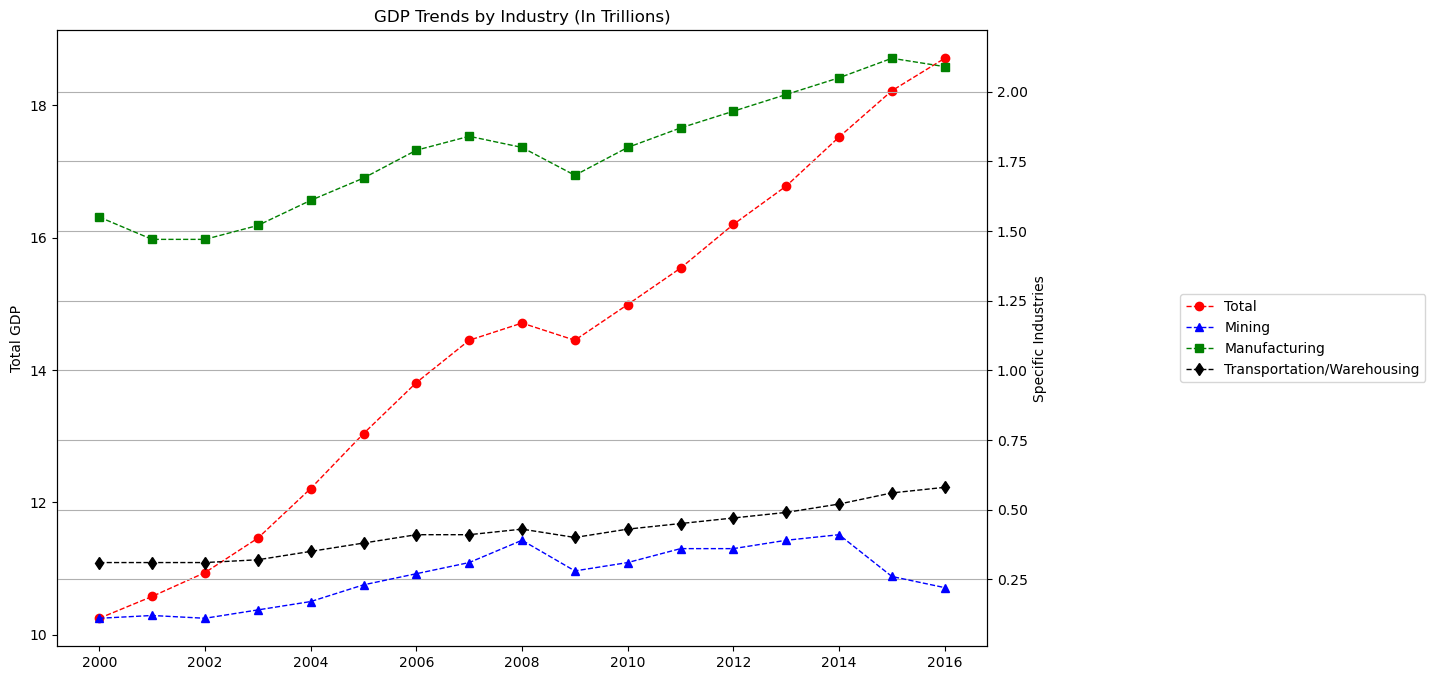

In [28]:
#Generate Visuals: GDP Trends by Industry
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

Total_GDP = ax1.plot(x_axis,merge_table['Total Industry'],marker="o",
                 color="red", linewidth=1, label="Total",ls='--')

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

Mining = ax2.plot(x_axis,merge_table['Mining, quarrying, and oil and gas extraction'],marker="^",
                        color="blue", linewidth=1, label="Mining",ls='--')

Manufacturing = ax2.plot(x_axis,merge_table['Manufacturing'],marker="s",
                     color="green", linewidth=1, label="Manufacturing",ls='--')

Transportation_Warehousing = ax2.plot(x_axis,merge_table['Transportation and warehousing'],marker="d",
                       color="black", linewidth=1, label="Transportation/Warehousing",ls='--')


GDP = Total_GDP+Mining+Manufacturing+Transportation_Warehousing
labs=[l.get_label() for l in GDP]
ax1.legend(GDP, labs, loc='center left', bbox_to_anchor=(1.2, 0.5) )

ax1.set_ylabel('Total GDP')
ax2.set_ylabel('Specific Industries')
plt.title('GDP Trends by Industry (In Trillions)')
plt.xlabel('Years')


plt.grid()


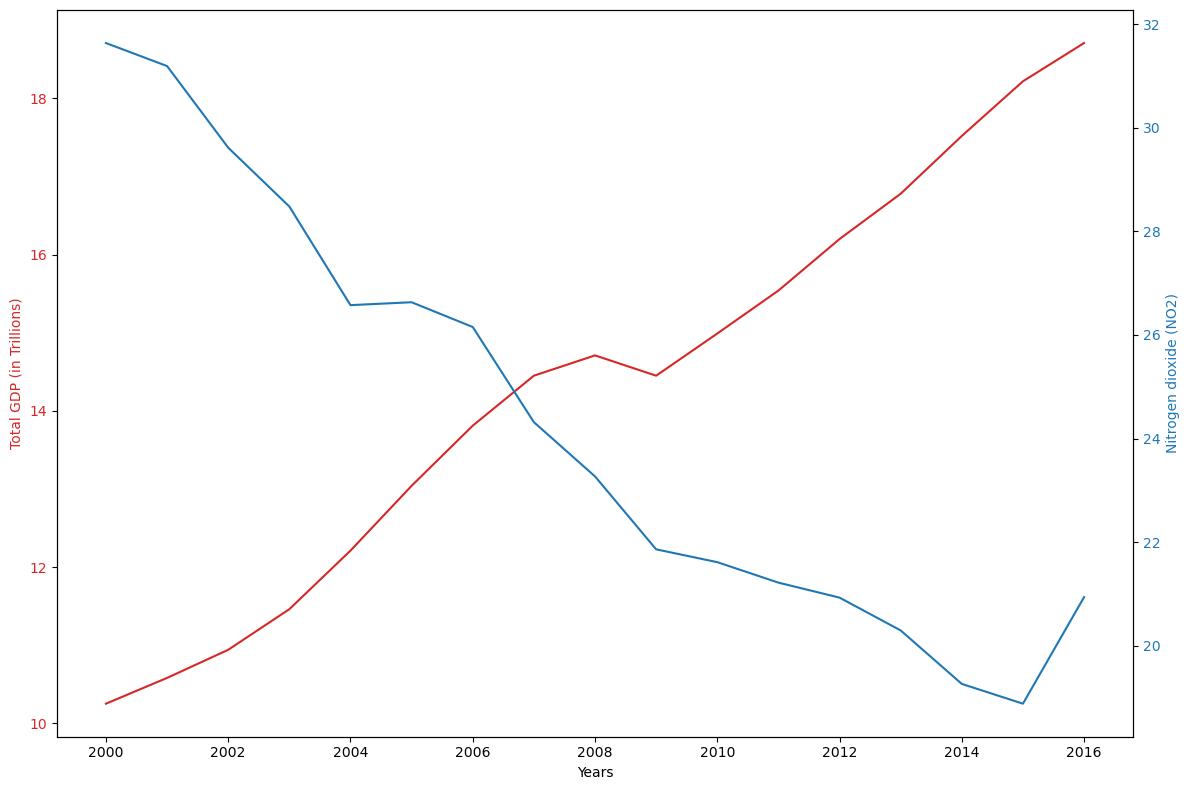

In [29]:
#Generate Visuals: N02 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Nitrogen dioxide (NO2)', color=color)
ax2.plot(x_axis, merge_table['NO2 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display graph
fig.tight_layout()  
plt.show()

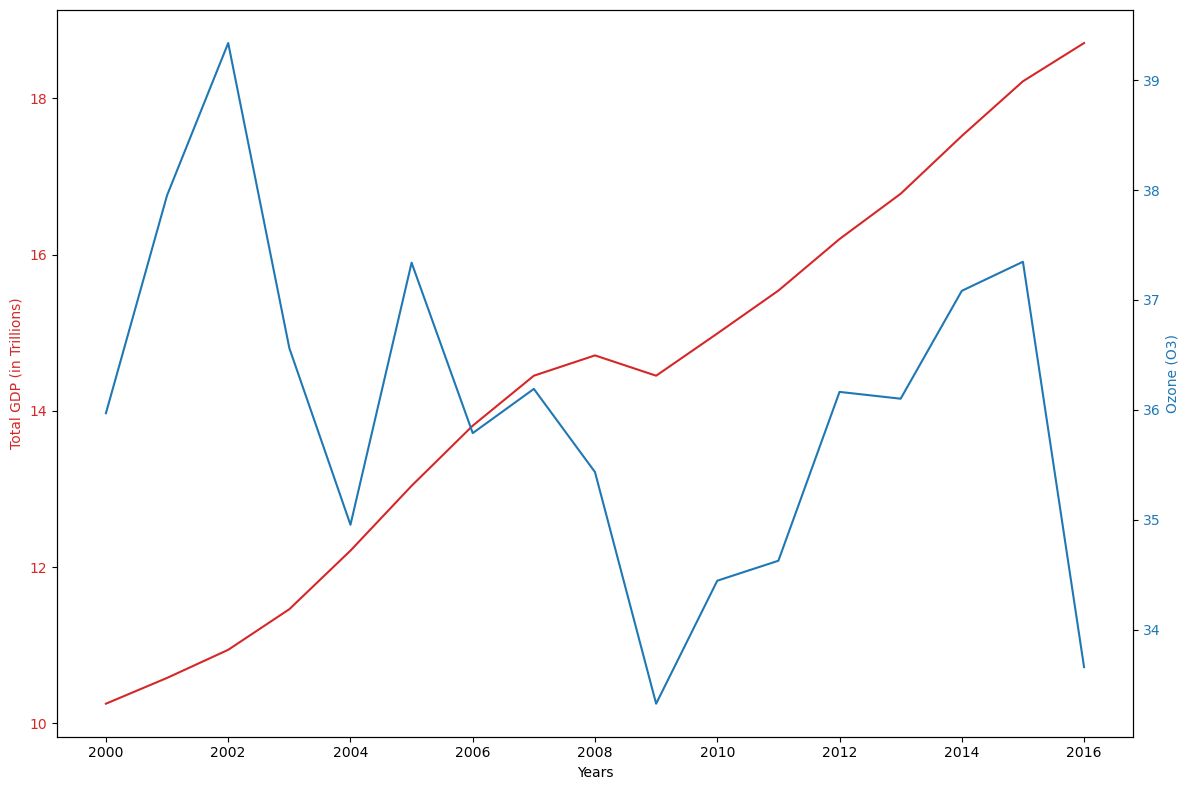

In [30]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Ozone (O3)', color=color)
ax2.plot(x_axis, merge_table['O3 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()


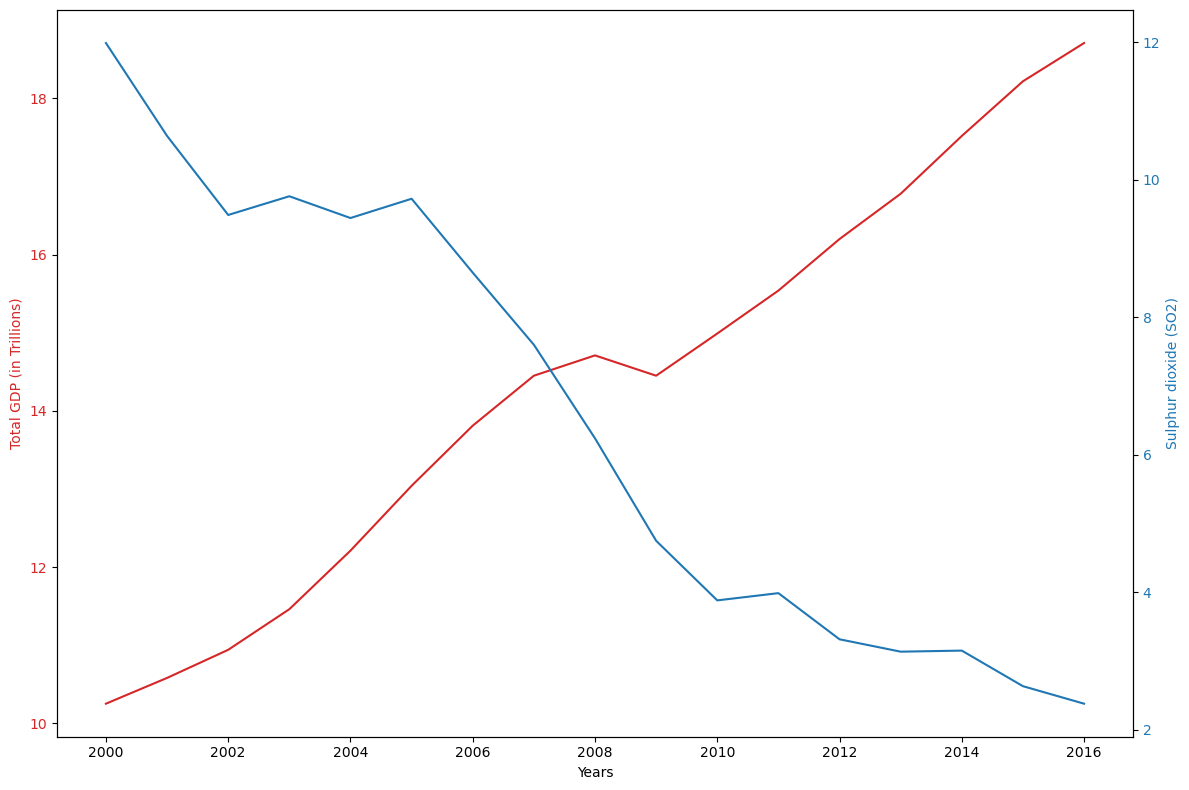

In [31]:
#Generate Visuals: SO2 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Sulphur dioxide (SO2)', color=color)
ax2.plot(x_axis, merge_table['SO2 AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()


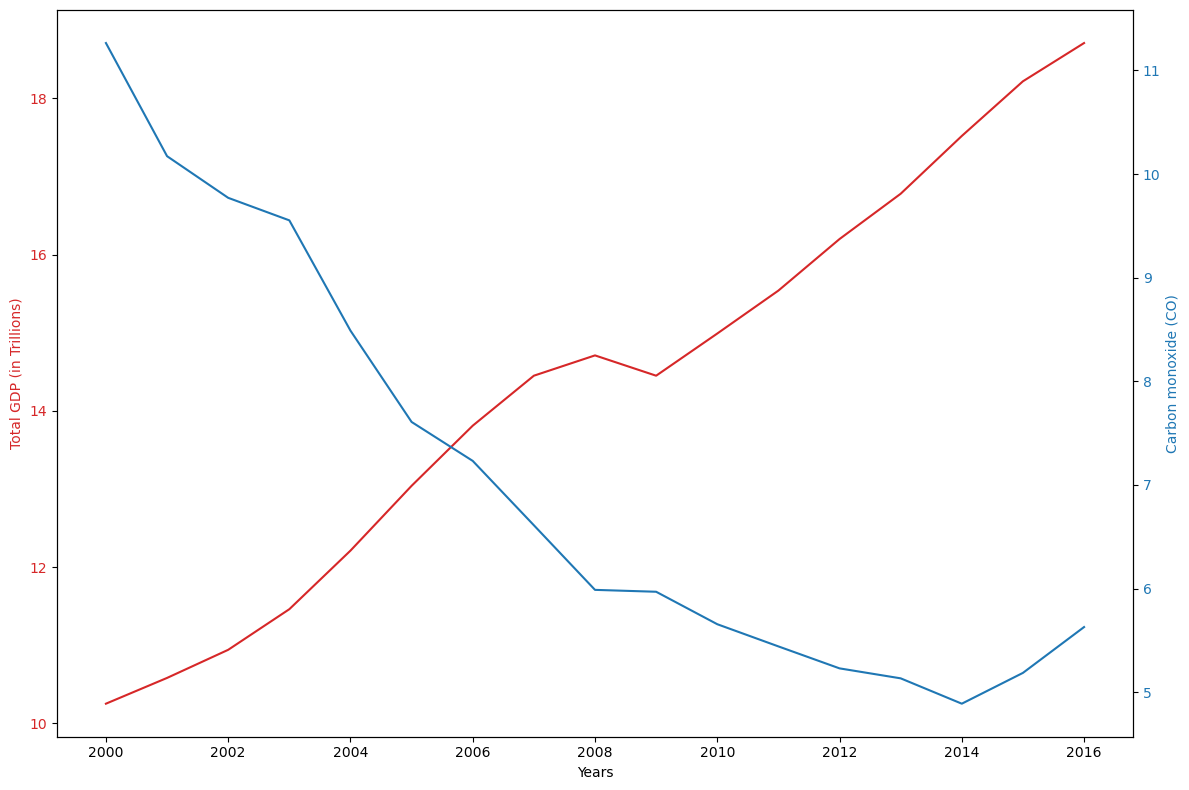

In [32]:
#Generate Visuals: CO AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Carbon monoxide (CO)', color=color)
ax2.plot(x_axis, merge_table['CO AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()

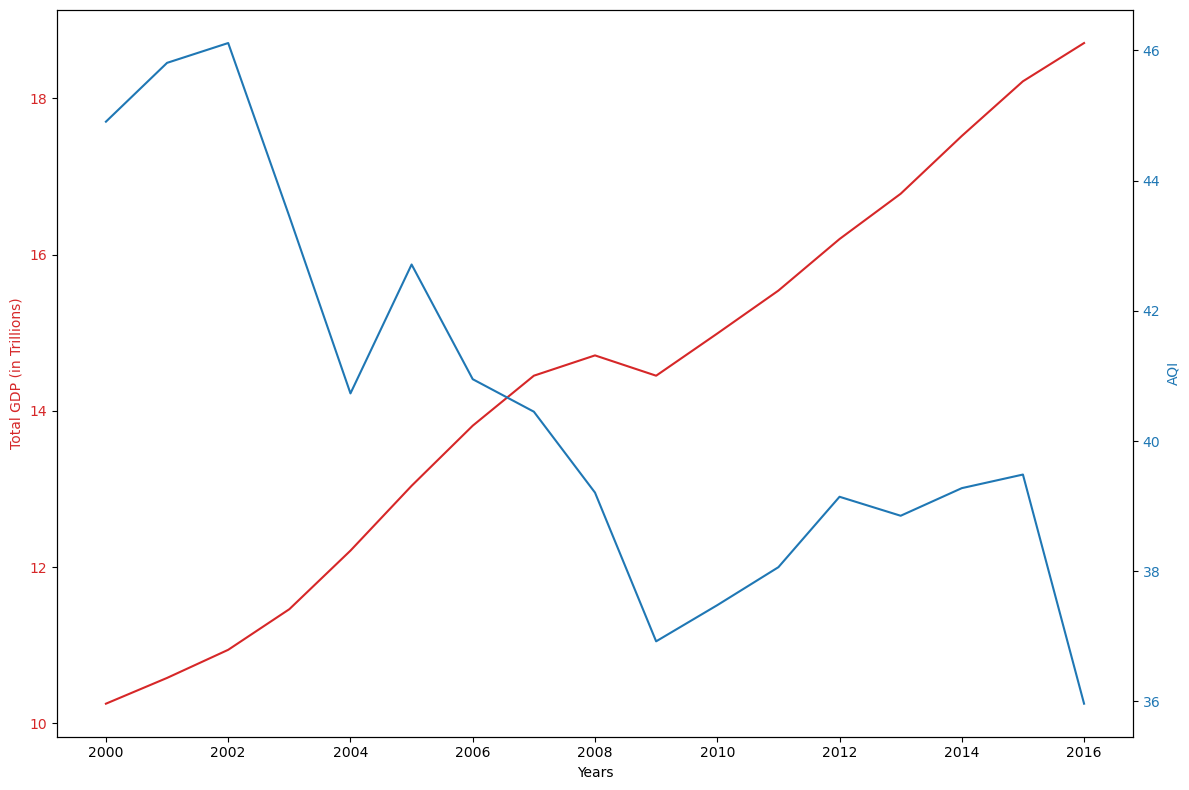

In [33]:
#Generate Visuals: Overall AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Total GDP (in Trillions)', color=color)
ax1.plot(x_axis, merge_table['Total Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('AQI', color=color)
ax2.plot(x_axis, merge_table['AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()

<h1>Comparison with Mortality

In [34]:
data25 = pd.read_csv('US_PM25_Mort_data.csv')
data25.head()

Country                                  Variable  Year  \
0  United States  Mortality from exposure to outdoor PM2.5  2000   
1  United States  Mortality from exposure to outdoor PM2.5  2001   
2  United States  Mortality from exposure to outdoor PM2.5  2002   
3  United States  Mortality from exposure to outdoor PM2.5  2003   
4  United States  Mortality from exposure to outdoor PM2.5  2004   

                        Unit     Value  
0  Per 1 000 000 inhabitants  362.2790  
1  Per 1 000 000 inhabitants  361.3241  
2  Per 1 000 000 inhabitants  359.6222  
3  Per 1 000 000 inhabitants  355.1779  
4  Per 1 000 000 inhabitants  342.3452

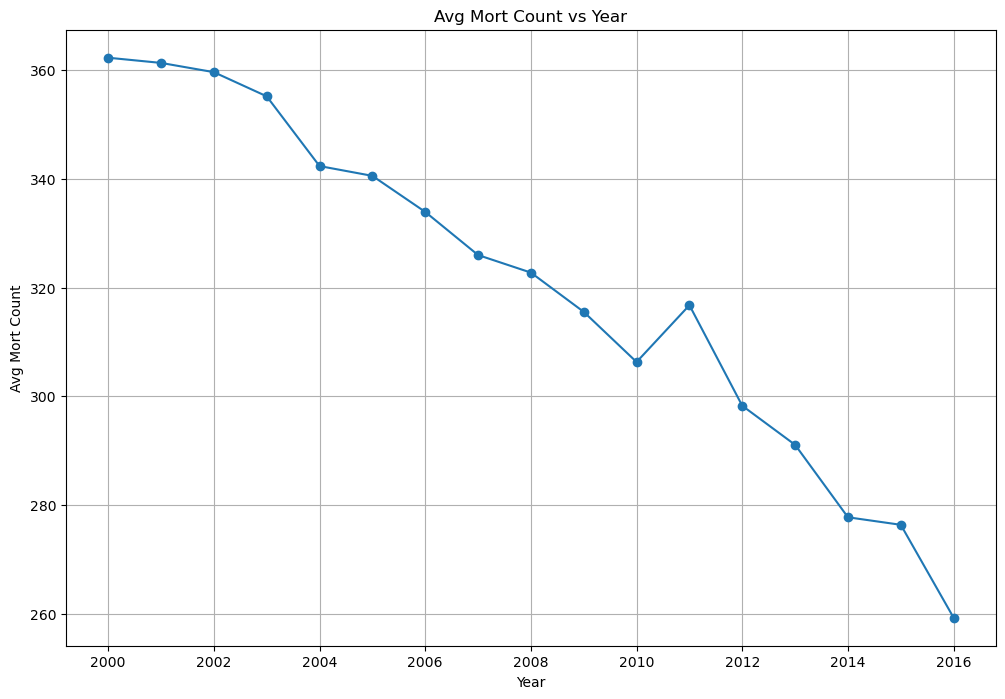

In [35]:
plt.plot(data25['Year'], data25['Value'], marker='o')
plt.title("Avg Mort Count vs Year")
plt.xlabel("Year")
plt.ylabel("Avg Mort Count")
plt.grid()


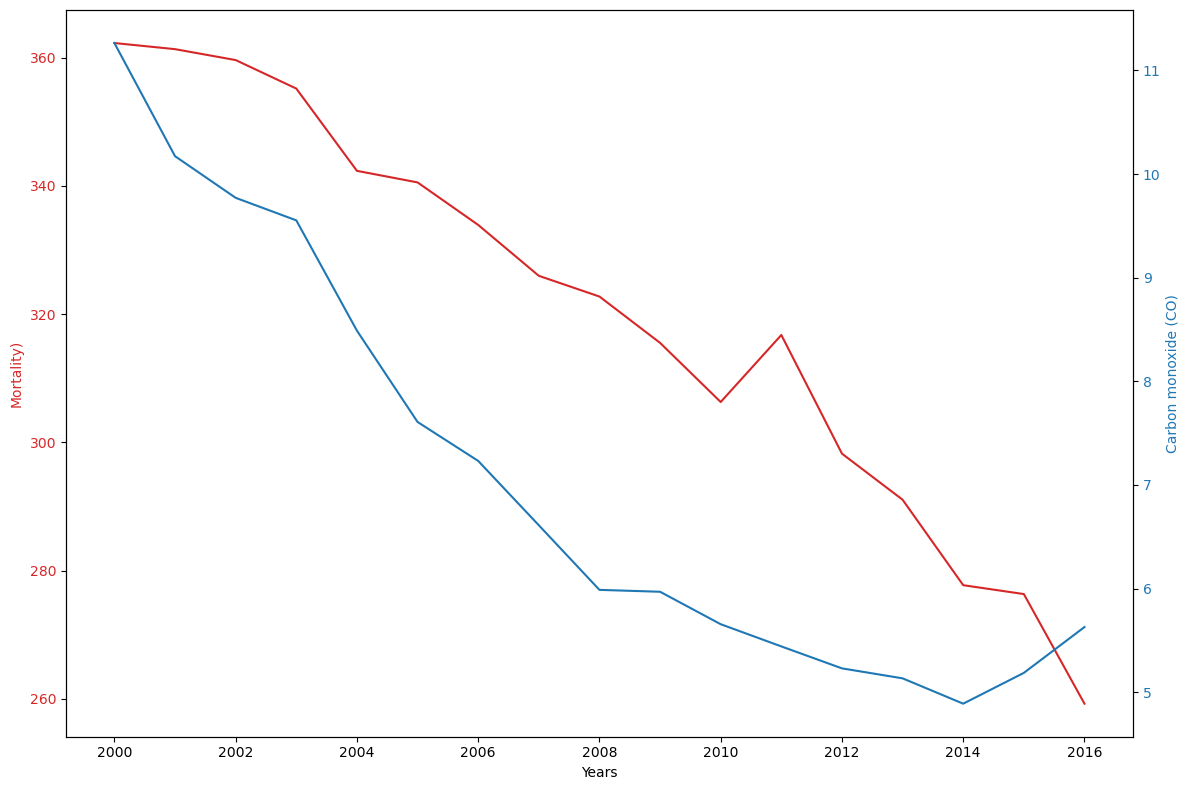

In [36]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Mortality)', color=color)
ax1.plot(x_axis, data25['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Carbon monoxide (CO)', color=color)
ax2.plot(x_axis, merge_table['CO AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()

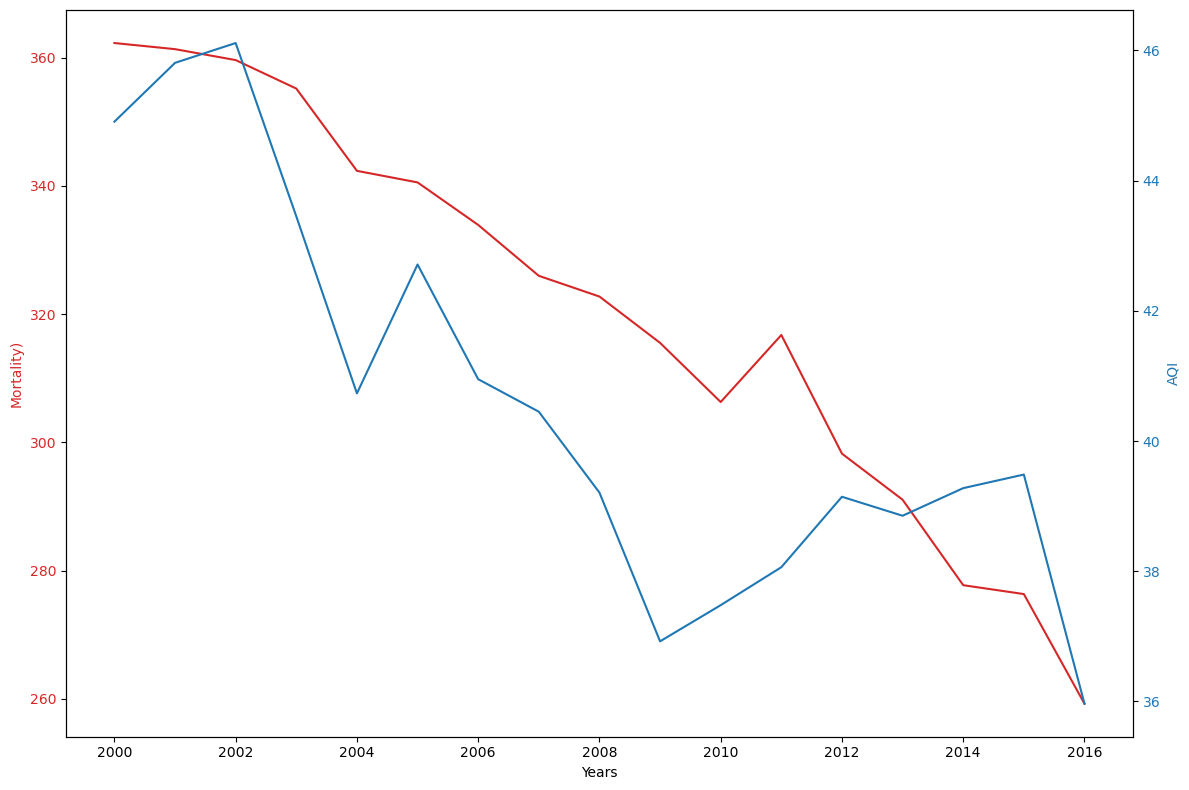

In [37]:
#Generate Visuals: O3 AQI Pollutant vs Total Industry GDP
x_axis = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Mortality)', color=color)
ax1.plot(x_axis, data25['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('AQI', color=color)
ax2.plot(x_axis, merge_table['AQI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Display Graph
fig.tight_layout()  
plt.show()